# K-Means

## Part I: Research Question

### A1. Research Question

With the available data, can we use k-means clustering technique to find groups of subscribers who churned, based on features such as 'Tenure' or 'MonthlyCharge', in an effort to reduce subscriber churn?

### A2. One Goal of the Data Analysis

The primary goal of this data analysis is, with the available data and utilizing k-means, to identify characteristics of groups of subscribers who churned. The goal is to recommend a course of action for the company to reduce subscriber churn.

## Part II: Technique Justification

### B1. How the Chosen Clustering Technique Analyzes the Data Set and Expected Outcomes

Clustering is a technique that can be used to divide the data into groups, wherein the data points within each group is similar to each other (Bruce et al., 2020). The chosen machine learning algorithm, k-means, will be used for clustering. It is widely employed due to its straightforwardness and its capability to handle sizable datasets (Bruce et al., 2020). The expected outcome will be that the clusters created will help the executive leadership to tailor retention efforts on the groups that are more likely to churn. The variables of tenure, bandwidth in gigabytes per year and monthly charge will be used. K-means will not create clusters of the identical sizing, but it will find clusters in the best way they can be separated (Bruce et al., 2020).

### B2. One Assumption of the Chosen Clustering Technique

One assumption of k-means clustering is that the clusters are to be of spherical shape. Utilizing spheres it assists the algorithm in keeping the clusters separate. When this assumption is violated, the clusters may take on shapes that are unexpected (Babitz, 2023).

### B3. Chosen Packages and Libraries and their use in the Analysis

Python will be used for its readability and the availability of packages and libraries for use in data analysis (Larose & Larose, 2019). The libraries and packages chosen include Pandas, Numpy, Scikit-Learn, Matplotlib, and Seaborn. Pandas will be used to import data (Vallisneri, 2018). Matplotlib's pyplot will be used for data visualizations. Utilizing the Matplotlib's plot function is good at creating plots to visualize the data (Larose & Larose, 2019). Numpy will be utilized to create object arrays. Seaborn will be used for additional visualizations. Scikit-Learn packages will be used for k-means, scaling and metrics. Specifically, scikit-learn's preprocessing and standardscaler packages will be used to standardize the data. Scikit-learn's cluster package will be used for k-means.Scipy will be used for statistical techniques.

## Part III: Data Preparation

### C1. One Data Preprocessing Goal

Since k-means will be used, scaling and standardizing will be important as they impact the accuracy of the model. If left unscaled, extreme values could dominate the analysis.

### C2. Relevant variables in Initial Data Set and their Classifications

The following variables were included in this analysis: Income, MonthlyCharge, Tenure, Bandwidth_GB_Year.

The records included in the analysis, were only those records for customers who churned (when the value for the variable Churn was 'Yes').

The variable Churn is a binary categorical variable. That is, two possible values for the variable are Yes and No. Of the 10,000 records, 7,350 of then have 'No' for this variable, that is the represent a subscriber that did not churn, or leave the company. Of those 10,000, 2,650 of them did churn. 

The remaining variables (Income, MonthlyCharge, Tenure, Bandwidth_GB_Year) are continuous variables.  Income had a positively skewed distribution. Tenure and Bandwidth_GB_Year had bimodal distributions.

The income ranged from a minimum of approximately \\$350, to a maximum of approximately \\$260,000, with an average mean income of approximately \\$40,000.  The number of children per customer ranged from 0 to 10, with the average being 2.  
The monthly charge ranged from approximately \\$80 to \\$290 per month. The average monthly charge was approximately \\$172 per month. 

The entire churn dataset contains information on 10,000 customers across various variables.  
   The continuous variables include:
       CaseOrder, Zip, Lat, Lng, Population, Children, Age, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Tenure, MonthlyCharge, Bandwidth_GB_Year, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8
   The categorical variables include:
       Customer_id, Interaction, UID, City, State, County, Area, Timezone, Job, Marital, Gender, Churn, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod.

### C3. Data Preparation Steps and the code for Each Step

After importing the necessary packages and libraries, the raw dataset will be imported.

The .info function will be used to view the column names and datatypes.

The total missing values in each column will be calculated using the isnull().sum() function. If necessary, imputation will be performed to replace the missing values with the appropriate mean, median or mode using the .fillna function.

Summary statistics will be viewed using the describe function. Less meaningful information for the purposes of Kmeans and the question at hand. The dataframe will be filtered to those subscribers who churned, the goal of this specific data analysis.

Univariate and bivariate visualizations will be generated to examine the distributions of the variables. 
Histograms will be created of the continuous variables to view the distributions. 

A correlation heatmap will be viewed to determine if any variables are highly correlated. 
If any variables are highly correlated, they will be reduced to improve the data analysis. 

Scatterplots will be used to view correlations between variables.

The dataframe will be scaled using SKLearn’s Standard Scaler.

Lastly, the prepared dataset will be extracted.

In [1]:
from platform import python_version
("Python version used during this analysis:", python_version())

('Python version used during this analysis:', '3.8.5')

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pylab
import statistics
import seaborn as sns

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import sklearn
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

print("Done.")

Done.


In [3]:
churn_df=pd.read_csv('Desktop/WGU/D212/churn_clean.csv')
print("Imported.")

Imported.


In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('display.max_columns', 60)

print("Display size adjusted.")

Display size adjusted.


In [5]:
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

**Assessing for missing values**

In [7]:
churn_df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

No nulls present.

**Viewing summary statistics**

In [8]:
churn_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


**Removing variables not needed for this specific analysis**

In [9]:
churn_df=churn_df.drop(columns=['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip',
                                'Lat','Lng','Population','Area','TimeZone','Job','Children','Age','Marital',
                                'Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Techie',
                                'Port_modem','Tablet','InternetService','Phone','Multiple','OnlineSecurity',
                                'OnlineBackup','DeviceProtection','TechSupport','PaperlessBilling','PaymentMethod',
                                'Gender','Contract','StreamingTV','StreamingMovies',
                                'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'])

In [10]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             10000 non-null  float64
 1   Churn              10000 non-null  object 
 2   Tenure             10000 non-null  float64
 3   MonthlyCharge      10000 non-null  float64
 4   Bandwidth_GB_Year  10000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 390.8+ KB


In [11]:
churn_df.head()

,Income,Churn,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,28561.99,No,6.795513,172.455519,904.536110
1,21704.77,Yes,1.156681,242.632554,800.982766
2,9609.57,No,15.754144,159.947583,2054.706961
3,18925.23,No,17.087227,119.956840,2164.579412
4,40074.19,Yes,1.670972,149.948316,271.493436


In [12]:
churn_df.shape

(10000, 5)

Filtering for the churned subscribers, as they're the subject of this analysis

In [13]:
churn_df=churn_df.loc[(churn_df.Churn=="Yes")]
churn_df.shape

(2650, 5)

In [14]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 1 to 9979
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             2650 non-null   float64
 1   Churn              2650 non-null   object 
 2   Tenure             2650 non-null   float64
 3   MonthlyCharge      2650 non-null   float64
 4   Bandwidth_GB_Year  2650 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.2+ KB


Removing the churn column, as the remaining records are all of those that churned.

In [15]:
churn_df=churn_df.drop(columns=['Churn'])

In [16]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 1 to 9979
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             2650 non-null   float64
 1   Tenure             2650 non-null   float64
 2   MonthlyCharge      2650 non-null   float64
 3   Bandwidth_GB_Year  2650 non-null   float64
dtypes: float64(4)
memory usage: 103.5 KB


In [17]:
churn_df.head()

,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year
1,21704.77,1.156681,242.632554,800.982766
4,40074.19,1.670972,149.948316,271.493436
6,11467.50,13.236774,200.118516,1907.242972
7,26759.64,4.264255,114.950905,979.612708
14,64256.81,10.060199,159.965581,1582.295235


### Visualizations of Distributions of Variables

#### Univariate Statistics

In [18]:
churn_df.describe()

,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,2650.000000,2650.000000,2650.000000,2650.000000
mean,40085.758332,13.147667,199.295175,1785.009247
std,28623.988269,15.577072,41.268191,1375.370184
min,348.670000,1.000259,92.455140,248.179366
25%,19234.990000,4.073001,167.484705,981.303767
50%,33609.940000,7.874490,200.118500,1357.828274
75%,54178.770000,13.761794,232.641455,1904.882596
max,189938.400000,71.645510,290.160419,7096.494932


Viewing histograms of the variables

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharge'}>,
        <AxesSubplot:title={'center':'Bandwidth_GB_Year'}>]], dtype=object)

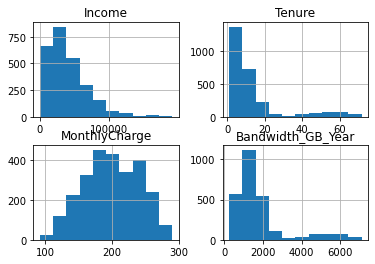

In [19]:
churn_df[['Income','Tenure','MonthlyCharge','Bandwidth_GB_Year']].hist()

#### Normalizing the Data using z-score with Standard Scaler from SKLearn

In [20]:
scaler=StandardScaler()
scaled_churn_df=scaler.fit_transform(churn_df[['Income','Tenure','MonthlyCharge','Bandwidth_GB_Year']])
scaled_churn_df=pd.DataFrame(scaled_churn_df, columns=['Income','Tenure','MonthlyCharge','Bandwidth_GB_Year'])
scaled_churn_df

,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.642274,-0.769930,1.050338,-0.715598
1,-0.000404,-0.736908,-1.195986,-1.100650
2,-0.999989,0.005721,0.019955,0.088890
3,-0.465646,-0.570395,-2.044194,-0.585696
4,0.844593,-0.198243,-0.953204,-0.147417
...,...,...,...,...
2645,0.797339,2.735226,1.353317,2.827654
2646,0.596260,3.682768,0.626521,3.803259
2647,0.080223,2.886811,1.111958,2.827223
2648,-0.112128,3.157639,0.808446,2.994558


### C4. Copy of Prepared Data Set

In [21]:
scaled_churn_df.to_csv('churn_prepared_kmeans_scaled.csv')

## Part IV: Analysis

### D1. Determining the Optimal Number of Cluster in the Data Set, and Description of the Method Used to Determine this Number

Viewing Correlation Matrix of variables

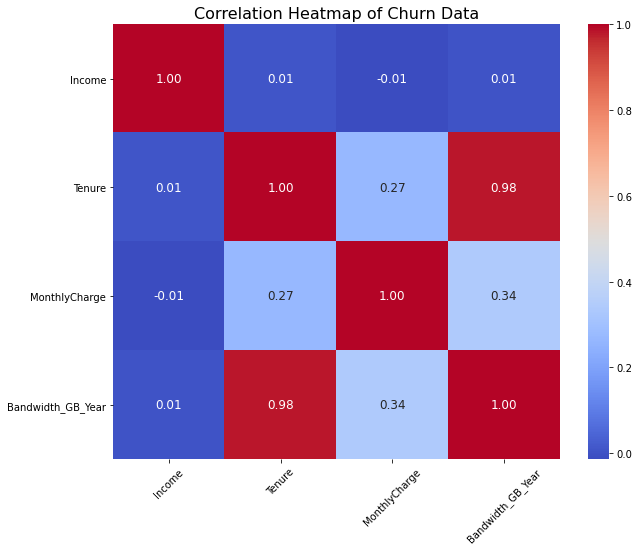

In [22]:
data = scaled_churn_df[['Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap of Churn Data', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Bandwidth_GB_Year and Tenure are very correlated with a score of 0.98. That is a nearly perfect correlation. Therefore, one of these variables should be removed from the analysis. I have selected Bandwidth_GB_Year to remove from the remainder of the analysis.

In [23]:
scaled_churn_df=scaled_churn_df.drop(columns=['Bandwidth_GB_Year'])

In [24]:
scaled_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Income         2650 non-null   float64
 1   Tenure         2650 non-null   float64
 2   MonthlyCharge  2650 non-null   float64
dtypes: float64(3)
memory usage: 62.2 KB


In [25]:
scaled_churn_df.head(5)

,Income,Tenure,MonthlyCharge
0,-0.642274,-0.769930,1.050338
1,-0.000404,-0.736908,-1.195986
2,-0.999989,0.005721,0.019955
3,-0.465646,-0.570395,-2.044194
4,0.844593,-0.198243,-0.953204


<AxesSubplot:xlabel='Income', ylabel='Tenure'>

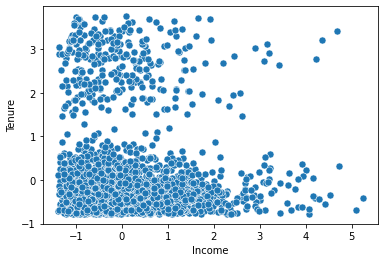

In [26]:
sns.scatterplot(data=scaled_churn_df, x='Income', y='Tenure',s=50)

<AxesSubplot:xlabel='Income', ylabel='MonthlyCharge'>

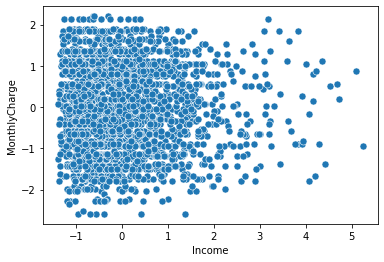

In [27]:
sns.scatterplot(data=scaled_churn_df, x='Income', y='MonthlyCharge',s=50)

<AxesSubplot:xlabel='Tenure', ylabel='MonthlyCharge'>

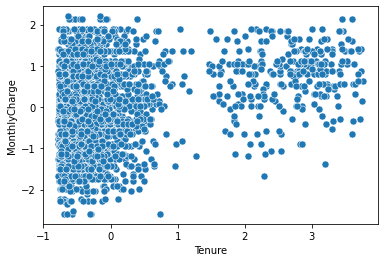

In [28]:
sns.scatterplot(data=scaled_churn_df, x='Tenure', y='MonthlyCharge',s=50)

Let's reduce the dataframe to only Tenure and MonthlyCharge.

In [29]:
scaled_churn_df=scaled_churn_df.drop(columns=['Income'])
scaled_churn_df.head()

,Tenure,MonthlyCharge
0,-0.769930,1.050338
1,-0.736908,-1.195986
2,0.005721,0.019955
3,-0.570395,-2.044194
4,-0.198243,-0.953204


The optimal number of clusters will be determined using the silhouette method and the elbow method. (Datacamp, n.d., SciKit-Learn, n.d.)

In [30]:
k_model=KMeans(n_clusters=3, n_init=25, random_state=1)
k_model.fit(scaled_churn_df)

KMeans(n_clusters=3, n_init=25, random_state=1)

In [31]:
evaluate=pd.Series(k_model.labels_).value_counts()
evaluate

1    1275
0    1092
2     283
dtype: int64

<AxesSubplot:xlabel='Tenure', ylabel='MonthlyCharge'>

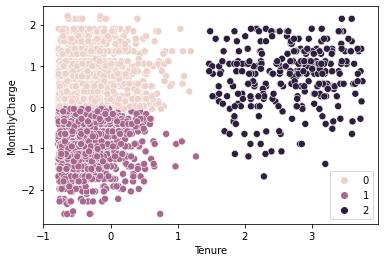

In [32]:
sns.scatterplot(data=scaled_churn_df, x='Tenure', y='MonthlyCharge',hue=k_model.labels_,s=50)

In [33]:
centroid=pd.DataFrame(k_model.cluster_centers_, columns=['Tenure','MonthlyCharge'])
centroid

,Tenure,MonthlyCharge
0,-0.286562,0.807500
1,-0.345796,-0.854517
2,2.663868,0.739865


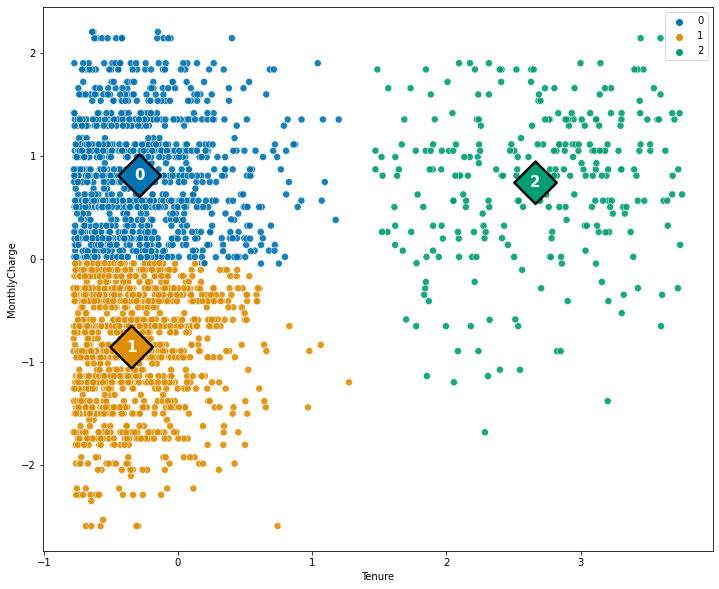

In [34]:
plt.figure(figsize=(12, 10))
ax=sns.scatterplot(data=scaled_churn_df, x='Tenure', y='MonthlyCharge', 
                   hue=k_model.labels_, palette='colorblind', alpha=0.9,s=50,legend=True)
ax=sns.scatterplot(data=centroid, x='Tenure', y='MonthlyCharge', hue=centroid.index,
                   palette='colorblind',s=900, marker='D', ec='black', legend=False)
for i in range(len(centroid)):
    plt.text(x=centroid.Tenure[i], y=centroid.MonthlyCharge[i],s=i,horizontalalignment='center',
             verticalalignment='center',size=15,weight='bold',color='white')

In [35]:
from sklearn.metrics import silhouette_score
silhouette=silhouette_score(scaled_churn_df, k_model.labels_, metric='euclidean')
print("Silhouette Score:", silhouette)

Silhouette Score: 0.5140222937504278


In [36]:
K = range(2, 8)
fits = []
score = []


for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init=25).fit(scaled_churn_df)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(scaled_churn_df, model.labels_, metric='euclidean'))
for k, s in zip(K, score):
    print(f"K={k}, Silhouette Score={s}")

K=2, Silhouette Score=0.6091972075742905
K=3, Silhouette Score=0.5140222937504278
K=4, Silhouette Score=0.4482039104124484
K=5, Silhouette Score=0.389952719872
K=6, Silhouette Score=0.36828415605397574
K=7, Silhouette Score=0.3767375448621128


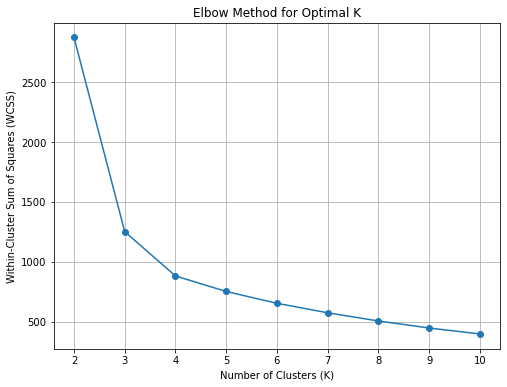

In [37]:
K = range(2, 11)
wcss = []  # Within-cluster sum of squares

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=25)
    kmeans.fit(scaled_churn_df)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K)
plt.grid(True)
plt.show()

#### After viewing the silhouette scores and the above graph utilizing the elbow method, they don't align on the ideal number of clusters(K). The silhouette method gives an ideal value of k=2, while the elbow method gives an ideal value of k=3. I will now visualize the graph using k=2 instead.

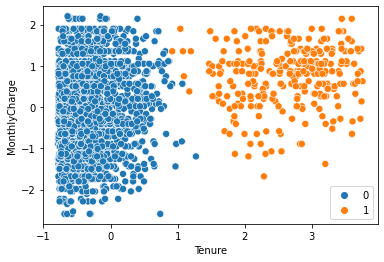

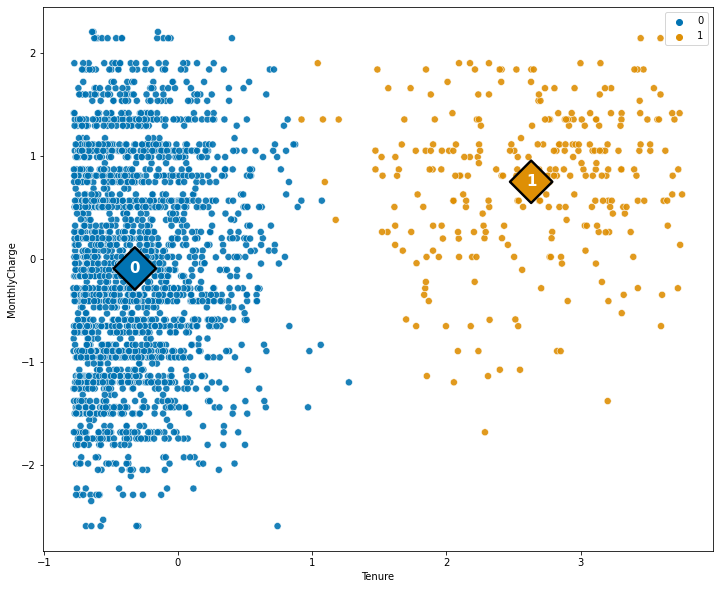

In [38]:
k_model=KMeans(n_clusters=2, n_init=25, random_state=1)
k_model.fit(scaled_churn_df)

evaluate=pd.Series(k_model.labels_).value_counts()
evaluate

sns.scatterplot(data=scaled_churn_df, x='Tenure', y='MonthlyCharge',hue=k_model.labels_,s=50)

centroid=pd.DataFrame(k_model.cluster_centers_, columns=['Tenure','MonthlyCharge'])
centroid

plt.figure(figsize=(12, 10))
ax=sns.scatterplot(data=scaled_churn_df, x='Tenure', y='MonthlyCharge', 
                   hue=k_model.labels_, palette='colorblind', alpha=0.9,s=50,legend=True)
ax=sns.scatterplot(data=centroid, x='Tenure', y='MonthlyCharge', hue=centroid.index,
                   palette='colorblind',s=900, marker='D', ec='black', legend=False)
for i in range(len(centroid)):
    plt.text(x=centroid.Tenure[i], y=centroid.MonthlyCharge[i],s=i,horizontalalignment='center',
             verticalalignment='center',size=15,weight='bold',color='white')

In [39]:
from sklearn.metrics import silhouette_score
silhouette=silhouette_score(scaled_churn_df, k_model.labels_, metric='euclidean')
print("Silhouette Score:", silhouette)

Silhouette Score: 0.6091972075742905


### D2. Code Used to Perform the Clustering Analysis

*Please see the code in section D1 above*

## Part V: Data Summary and Implications

### E1. Quality of Clusters Created

As seen in section D1 above, utilizing the elbow method, it determined the optimal number of clusters to be 3. Using 3 clusters (k=3), the resulting silhouette score was 0.5140222937504278. With a silhouette score of 1.0 representing the best possible score, and indicating that the clusters are well-separated and have high cohesion within each of the clusters.  When I adjusted the clusters to two, the silhouette score increased to 0.6091972075742905.

### E2. Results and Implications of Clustering Analysis

The cluster analysis through k-means, ultimately resulted in two clusters, or groups, of subscribers. The first group represents those with a shorter tenure. Their monthly charges were variable. The second group represents those subscribers with a longer tenure. Their monthly charges tended to be on the higher end of the range. So in trying to group together the subscribers who left the company, those who left after a shorter period of time, their monthly charge varied widely. However, what is very interesting to note is that the subscribers who left after a longer tenure, were those who had a monthly charge on the higher end of the range.

### E3. One Limitation of the Data Analysis

One limitation of this data analysis is that the dataset is not very large. The dataset only included information for 10,000 customers. If the dataset were larger, provided more customer variables, or provided more data on customers who ultimately churned, the generated model could possibly be more accurate. 

### E4. Recommended Course of Action

As mentioned in E2 above, the second cluster yielded the most beneficial information for the executive leadership team. It shows that of those subscribers that left the company, and had been customers for a longer tenure, were those with a higher monthly charge. This shows that the company can gear their marketing and retention offers on perhaps assisting their long-term subscribers in reducing their monthly charges. A small reduction in profits, while reducing profitability initially, could retain the subscriber for a longer period of time, thus increasing profits.

### Code Sources

Datacamp. (n.d). Cluster Analysis in Python. https://app.datacamp.com/learn/courses/cluster-analysis-in-python

SciKit-Learn. (n.d.). Clustering. https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

### Additional Sources

Babitz, K. (2023). *Introduction to k-means clustering with scikit-learn in python.* Datacamp. 
https://www.datacamp.com/tutorial/k-means-clustering-python

Bruce, P., Bruce, A., & Gedeck, P. (2020). *Practical statistics for data scientists : 50+ essential concepts using r and python.* O'Reilly Media, Incorporated.

Larose, C.D., & Larose, D.T. (2019). *Data science using Python and R.* John Wiley & Sons.

Vallisneri, M. (2018). *Python statistics essential training.* LinkedIn Learning.
https://www.linkedin.com/learning/python-statistics-essential-training/the-structure-of-data?u=2045532